#1.Vẽ model dự đoán (đường thẳng) và dữ liệu (point - scatter).
#2.Dự đoán giá các căn nhà có diện tích 50, 100, 150.
#Sử dụng data 'data_linear.csv'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
%cd '/content/drive/MyDrive/DSEB_61/Machine learning/Data'
!ls

/content/drive/MyDrive/DSEB_61/Machine learning/Data
data_linear.csv  housing.csv


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
data = pd.read_csv('data_linear.csv')
data.head()

,Diện tích,Giá
0,30.0000,448.524
1,32.4138,509.248
2,34.8276,535.104
3,37.2414,551.432
4,39.6552,623.418


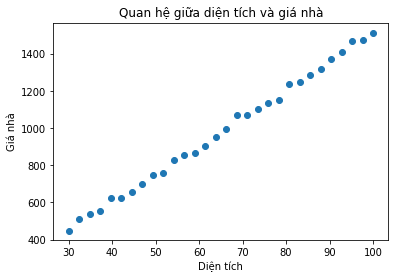

In [10]:
x = np.array([data['Diện tích']]).T
y = np.array([data['Giá']]).T
plt.scatter(x,y)
plt.xlabel('Diện tích')
plt.ylabel('Giá nhà')
plt.title('Quan hệ giữa diện tích và giá nhà')
plt.show()

In [11]:
one = np.ones((x.shape[0], 1))
Xbar = np.concatenate((one, x), axis = 1)

In [12]:
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)
print('w = ', w)

w =  [[-7.06426865]
 [15.2110908 ]]


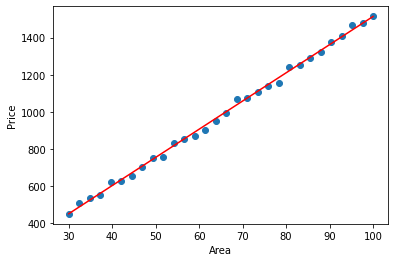

In [13]:
w_0 = w[0][0]
w_1 = w[1][0]
x_line = [30,100]
y_line = [w_1*i + w_0 for i in x_line]
plt.plot(x_line , y_line , 'r')
plt.scatter(x,y)
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

In [14]:
x_test = np.array([50,100,150]).reshape(-1,1)

for i in x_test:
  y_pre = w_1*i + w_0
  print("Với căn nhà có diện tích là {} thì có giá là: {}".format(int(i),float(y_pre)))

Với căn nhà có diện tích là 50 thì có giá là: 753.4902713382884
Với căn nhà có diện tích là 100 thì có giá là: 1514.0448113217797
Với căn nhà có diện tích là 150 thì có giá là: 2274.599351305271


#Viết code numpy, tìm model linear regression cho bài toán dữ đoán giá nhà 
# Sử dụng data 'housing.csv'

In [15]:
dt = pd.read_csv('housing.csv',sep = '\s+', header=None)
dt.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [16]:
data_new = pd.DataFrame(data = dt.values , columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])
data_new.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [24]:
cor = data_new.corr(method='pearson')

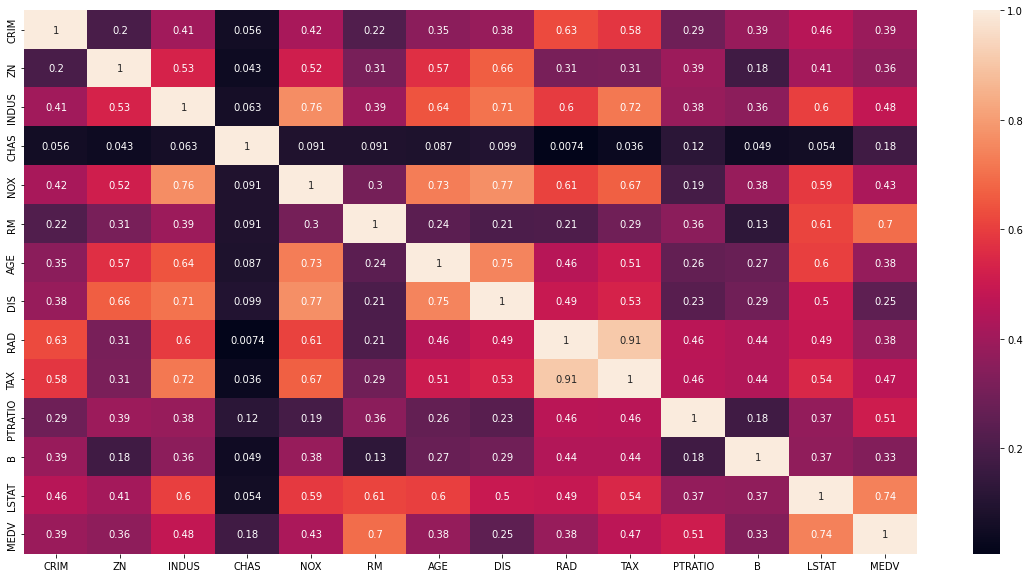

In [28]:
plt.figure(figsize=(20, 10))
sns.heatmap(data_new.corr().abs(),  annot=True)

In [30]:
x = np.array([data_new['RM'],data_new['LSTAT']]).T
y = np.array([data_new['MEDV']]).T

In [31]:
one = np.ones((x.shape[0], 1))
Xbar = np.concatenate((one, x), axis = 1)

In [32]:
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)
print('w = ', w)

w =  [[-1.35827281]
 [ 5.09478798]
 [-0.64235833]]
